In [602]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
file_path = 'https://raw.githubusercontent.com/SrmxKub/Linear-Project/refs/heads/main/Linear_noon_perfumes_cleaned_dataset.csv'
df = pd.read_csv(file_path)

In [603]:
# Check if there is any missing data
print(df.isna().sum())

perfume_id            0
brand                 0
name                  0
old_price             0
new_price             0
ml                    0
concentration         0
department            0
scents                0
base_note             0
middle_note           0
item_rating           0
seller                0
seller_rating         0
num_seller_ratings    0
dtype: int64


In [604]:
# Check for duplicate rows ignoring of perfume_id column
df = df.drop("perfume_id", axis = 1)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 100


In [605]:
# Make number of seller rating to integer
df['num_seller_ratings'] = df['num_seller_ratings'].apply(lambda x: float(x.replace('K', '')) * 1000 if 'K' in x else x).astype(int)

# Create new data without duplicate rows and reset index
new_data = df.drop_duplicates().reset_index(drop = True)
new_data.head()

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli, Vetiver","Hazelnut, Jasmine, Cashmirwood, Cedar , Honey",5.0,noon,4.2,98100
1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood, Patchouli","Wild Jasmine , Red Lily",4.8,noon,4.2,98100
2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint, Wood, Moss","Sandalwood, Cedar",5.0,noon,4.2,98100
3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss, Rippled Sand Accord","Blue Coral Aquaspace Accord, Geranium",3.0,noon,4.2,98100
4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98100


In [606]:
# Function for calculate cosine similarity
def cosine_similarity_cal(feature, filtered_data, input_value):

  input_df = pd.DataFrame({feature: [input_value]})
  combined_df = pd.concat([filtered_data[[feature]], input_df])

  # Use TF-IDF to vectorize the string value
  tfidf_matrix = TfidfVectorizer().fit_transform(combined_df[feature])

  return cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()

In [607]:
# Input sample values
scents = "Woody"
base_notes = "Oakmoss, Patchouli, Vetiver"
middle_notes = "Jasmine, Hazelnut, Cashmirwood, Honey"
department = "Men"  # Filter

In [608]:
# Filter the DataFrame by department
filtered_data = new_data[new_data['department'] == department]

if filtered_data.empty:
  print('Not Found')

else:
  scent_sim = cosine_similarity_cal('scents', filtered_data, scents)
  base_note_sim = cosine_similarity_cal('base_note', filtered_data, base_notes)
  middle_note_sim = cosine_similarity_cal('middle_note', filtered_data, middle_notes)
  similarity = (scent_sim + base_note_sim + middle_note_sim) / 3

  data = filtered_data.copy()
  data['cosine_scent'] = scent_sim
  data['cosine_base_note'] = base_note_sim
  data['cosine_middle_note'] = middle_note_sim
  data['cosine_similarity'] = similarity

  # Sort results by similarity
  top_similar_perfumes = data.sort_values(by = 'cosine_similarity', ascending = False).head(10)

  # Display the most top N similar perfumes
  print(top_similar_perfumes[['name', 'brand', 'department', 'cosine_similarity', 'cosine_scent', 'cosine_base_note', 'cosine_middle_note']])


                  name           brand department  cosine_similarity  \
0      1 Million Lucky    PACO RABANNE        Men           0.980286   
324    1 Million Lucky    PACO RABANNE        Men           0.812776   
470             Escape    Calvin Klein        Men           0.608826   
678  Sheikh Al Shuyukh     Arabian Oud        Men           0.578785   
465            Extreme       TRUSSARDI        Men           0.578785   
791              Black  Mandarina Duck        Men           0.578785   
134  One Million Lucky    PACO RABANNE        Men           0.565677   
567        Marbert Man     marbert man        Men           0.554759   
554   900 Herbal Spray          Aramis        Men           0.537942   
380          Polo Blue    RALPH LAUREN        Men           0.517454   

     cosine_scent  cosine_base_note  cosine_middle_note  
0             1.0          1.000000            0.940858  
324           1.0          1.000000            0.438328  
470           1.0          0.8264

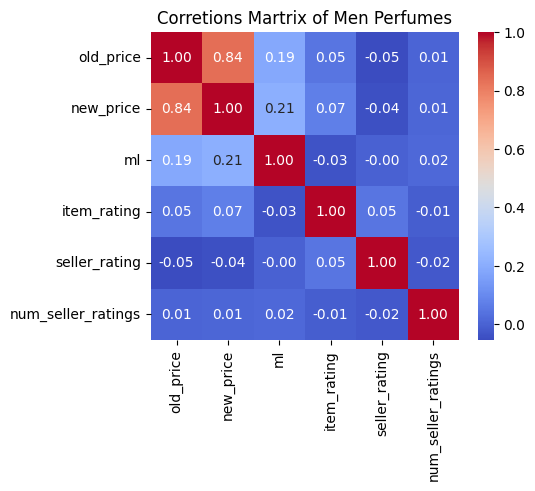

In [609]:
  import seaborn as sns
  import matplotlib.pyplot as plt

  # Creating a correlations matrix
  correlation_matrix = filtered_data[['old_price', 'new_price', 'ml', 'item_rating', 'seller_rating', 'num_seller_ratings']].corr()

  # Visualize the correlation matrix using a heatmap
  plt.figure(figsize = (5, 4))
  sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", square = True)
  plt.title(f'Corretions Martrix of {department} Perfumes')
  plt.show()